# 05-2. Best CNN Model Tracer

In [4]:
from tensorflow import keras

In [5]:
model = keras.models.load_model('best-cnn-model.h5')

OSError: SavedModel file does not exist at: best-cnn-model.h5/{saved_model.pbtxt|saved_model.pb}

In [3]:
model.layers

In [4]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
import numpy

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.026641147 0.3538955


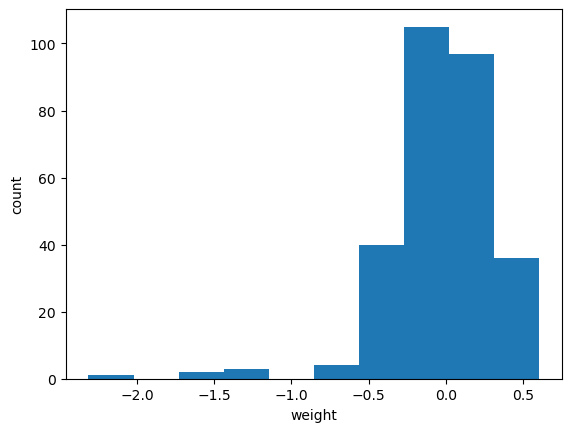

In [6]:
import os
import matplotlib.pyplot as plt

os.environ['KMP_DUPLICATION_LIB_OK'] = 'True'

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

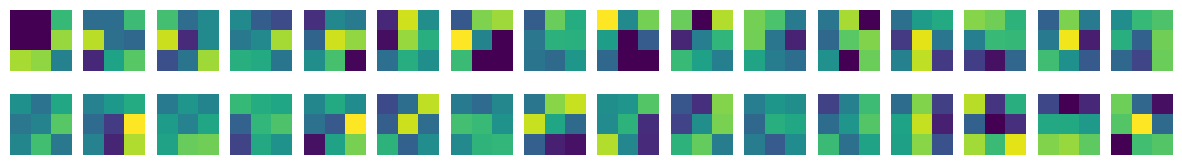

In [9]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
        
plt.show()

In [10]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
                              padding='same', strides=1,
                              input_shape=(28, 28, 1),
                              activation='relu'))

In [13]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [14]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.007764433 0.08212485


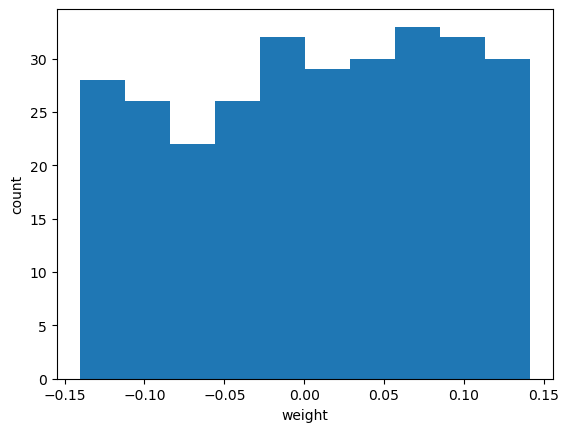

In [15]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

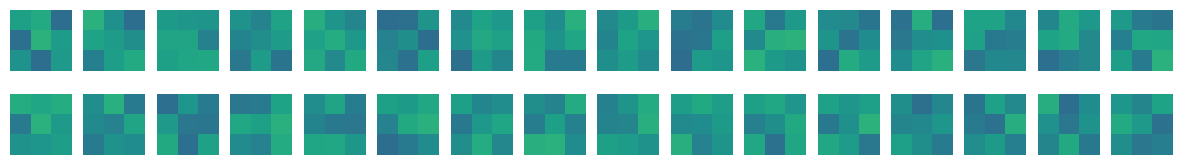

In [16]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
        
plt.show()